In [23]:
# pandas kutubxonasi: ma'lumotlar bilan ishlash uchun.
import pandas as pd
# train_test_split — ma’lumotni o‘qitish va testga bo‘lish uchun.
from sklearn.model_selection import train_test_split
# LogisticRegression — model yaratish uchun.
from sklearn.linear_model import LogisticRegression
# accuracy_score, confusion_matrix, classification_report — model baholash uchun.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# seaborn, matplotlib.pyplot — grafik chizish uchun.
import seaborn as sns
import matplotlib.pyplot as plt
# StandardScaler — ma’lumotlarni standartlashtirish uchun.
from sklearn.preprocessing import StandardScaler

In [24]:
# Data yuklab oldim
data = pd.read_csv('/content/Data.csv')

In [25]:
# Datamni kordim
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [26]:
# x va y ga ajratdik
X = data[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
y = data['Class']

In [27]:
# Har bir ustunni 0 ga yaqinlashtirib, bir xil miqyosga keltiradi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
#  Ma’lumot 80% o‘qitish va 20% test uchun ajratiladi.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
# Logistik regressiya modeli yaratilmoqda.
# C=0.1 — bu regulyarizatsiya kuchini belgilaydi (overfittingga qarshi).
model = LogisticRegression(C=0.1)

In [31]:
# Madelga o'rgatish jarayoni
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [32]:
# Test ma’lumotlariga model bashorat beradi.
y_pred = model.predict(X_test)

In [33]:
# Xatoliklarini aniqlash
print("Aniqlik (accuracy):", accuracy_score(y_test, y_pred))
print("nConfusion Matrix:", confusion_matrix(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Aniqlik (accuracy): 0.9562043795620438
nConfusion Matrix: [[78  1]
 [ 5 53]]
Classification Report:               precision    recall  f1-score   support

           2       0.94      0.99      0.96        79
           4       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



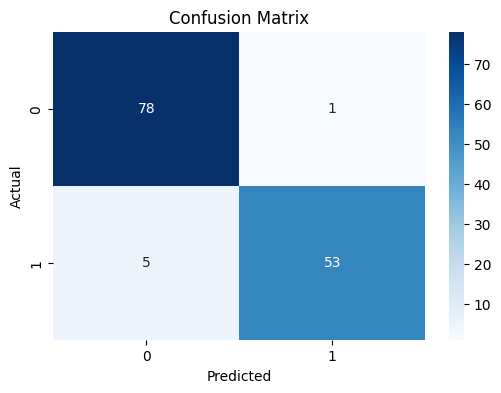

In [34]:
#  Grafikda modelning nechta holatda to‘g‘ri/noto‘g‘ri bashorat bergani ko‘rsatiladi.
cm = confusion_matrix(y_test, y_pred)
# Chizish
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()